In [1]:
import numpy, os
import sqlite3 as sql
import yfinance as yf
import pandas as pd

from src.db_default import db_tables, db_dir, db_tickers
from src.db_class import DBCursor, FinanceDB

### Pulling data from DB


In [2]:
financedb = FinanceDB('/home/tiantian/temporary/financial_db/finance.db')

In [3]:
financedb.execute("PRAGMA table_info(security_price)")

[(0, 'security_ticker', 'INT', 0, None, 1),
 (1, 'date', 'TEXT', 0, None, 2),
 (2, 'open', 'REAL', 0, None, 0),
 (3, 'high', 'REAL', 0, None, 0),
 (4, 'low', 'REAL', 0, None, 0),
 (5, 'close', 'REAL', 0, None, 0),
 (6, 'volume', 'INT', 0, None, 0),
 (7, 'adj_close', 'REAL', 0, None, 0)]

In [4]:
financedb.execute("""SELECT name FROM sqlite_schema
                        WHERE type='table'
                        ORDER BY name;""")

[('company',),
 ('exchange',),
 ('security',),
 ('security_price',),
 ('security_price_intraday',),
 ('stock_adjustment',)]

In [15]:
msft = financedb.execute("""SELECT close FROM security_price
                            WHERE security_ticker = 'MSFT'
                            ORDER BY date ASC""")
msft = np.array(msft)

[]

In [40]:
from sklearn.model_selection import train_test_split

seed1 = 2
seed2 = 0
seed3 = 0

numpy.random.seed(seed1)
msft = numpy.random.normal(loc=1, scale=0.1, size=100000)

numpy.random.shuffle(msft)

seq_size = 2

frac_diff = msft[1:] - msft[:-1]
# frac_diff = diff/msft[:-1]
# frac_diff = msft

n_samples = len(frac_diff) // (seq_size+1)
if len(frac_diff)%(seq_size+1) != 0:
    data = frac_diff[:-(len(frac_diff)%(seq_size+1))]
else:
    data = frac_diff
    
data = data.reshape((n_samples, (seq_size+1)))
X = data[:,:seq_size]
Y = numpy.sign(data[:,-1])

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,test_size=0.2, random_state=seed2)

1.0824309438163965e-06


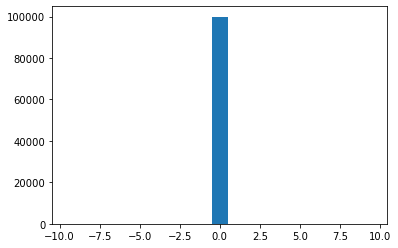

In [41]:
import matplotlib.pyplot as plt

print(numpy.mean(frac_diff))

plt.hist(frac_diff, bins=numpy.linspace(-9.5, 9.5, 20))
plt.show()

0.0003900039000390004


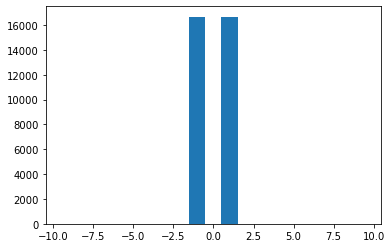

In [42]:
print(numpy.mean(Y))

plt.hist(Y, bins=numpy.linspace(-9.5, 9.5, 20))
plt.show()

In [43]:
from sklearn.ensemble import RandomForestClassifier

classifer = RandomForestClassifier

myRF_clf = classifer(
        n_estimators=100,
        max_depth=None, 
        min_samples_split=2, # minimum number of sample per leaf
        oob_score=True,
        random_state=seed3,
        warm_start=False # this ensures that you add estimators without retraining everything
    )

myRF_clf.fit(X_train, Y_train)

print(myRF_clf.score(X_train,Y_train),myRF_clf.oob_score_)
print(myRF_clf.score(X_test,Y_test))

0.9999249981249532 0.6536038400960024
0.6515674216289186


In [14]:
print(X.shape, Y.shape)

(3846, 25) (3846,)


In [15]:
print(X[:10], Y[:10])

[[ 0.33275172 -0.22485198 -0.11576039 -0.24245677  0.44447863 -0.4166138
   0.90837158  0.14377952 -1.16044248  0.81656704 -0.52566024  0.07829928
   0.71510415 -1.70912116  0.03218648 -0.1338218   1.6248029  -0.10892619
   0.18371079  0.21721239 -0.35891956 -0.6753584   0.63809963 -1.3245095
   1.04329319]
 [ 1.60263126 -0.84564119 -0.21437276 -0.30021266  1.01935615 -0.63616671
   0.22456723 -1.0992883   1.19769139 -0.01107955  0.00967655  0.65362816
  -0.52385556 -0.6446248   0.15504811  0.52119848 -1.27481145  1.21308249
   0.00774231 -0.92051062 -0.16291253  0.37300411  0.09656484  0.412972
  -0.26319051]
 [-1.77265805  0.21366389 -0.09513448  0.98359762 -0.79963345  0.42603834
  -0.44377036 -0.17091202 -0.09718888  1.0919089  -1.03629328  0.11679882
   0.34428562  0.90453612 -1.44778391  1.48168726 -1.483693    1.76072211
  -1.01561653  1.01621977 -0.74383114  0.26883612 -1.40015157  0.48723834
  -0.3252208 ]
 [-0.35482496  0.39851092  0.19255963 -0.700231    1.25664925 -0.251741

In [25]:
print(sum(Y_train), sum(Y_test))

98.0 8.0
